In [ ]:
import scipy.linalg
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-Processing

## Data Importing

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
#path = '/content/drive/MyDrive/O4DS - Project Work/goodreads_cleaned.csv'
path = 'goodreads_cleaned.csv'

In [5]:
df = pd.read_csv(path, sep = ";")
df

,user_id,book_id,rating
0,8842281e1d1347389f2ab93d60773d4d,18245960,5
1,8842281e1d1347389f2ab93d60773d4d,16981,3
2,8842281e1d1347389f2ab93d60773d4d,28684704,3
3,8842281e1d1347389f2ab93d60773d4d,27161156,0
4,8842281e1d1347389f2ab93d60773d4d,25884323,4
...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,3
899996,b9450d1c1f97f891c392b1105959b56e,16095092,3
899997,b9450d1c1f97f891c392b1105959b56e,8430896,4
899998,b9450d1c1f97f891c392b1105959b56e,12275680,4


## Data Exploration

In [6]:
df.user_id.value_counts().describe()

count    12188.000000
mean        73.843124
std        103.860677
min          1.000000
25%         14.000000
50%         37.000000
75%         92.000000
max       1815.000000
Name: user_id, dtype: float64

In [7]:
df.book_id.value_counts().describe()

count    25474.000000
mean        35.330141
std         67.222413
min          1.000000
25%         10.000000
50%         17.000000
75%         34.000000
max       1734.000000
Name: book_id, dtype: float64

## Data Cleaning

In [8]:
df['book_id_count'] = df.groupby('book_id')['book_id'].transform('count')
df['user_id_count'] = df.groupby('user_id')['user_id'].transform('count')
df.book_id_count.quantile(0.9)

457.0

In [9]:
book_quantile = 0.9
user_quantile = 0.25

df = df.loc[(df.book_id_count >= df.book_id.value_counts().quantile(book_quantile)) & (df.user_id_count >= df.user_id.value_counts().quantile(user_quantile)),:]


In [10]:
df.shape

(425794, 5)

## Data Pivoting

In [11]:
df = pd.pivot_table(df, columns="book_id", index="user_id", values="rating")
df.head(10)

book_id,1,2,3,5,6,11,34,295,320,343,350,662,667,830,865,890,902,930,960,968,1103,1232,1420,1617,1618,1622,1845,1852,1885,1934,1953,2052,2156,2165,2187,2493,2526,2612,2623,2657,2744,2839,2956,2998,3008,3431,3473,3636,3682,3758,...,30269126,30312891,30325011,30415154,30555488,30633337,30653853,30687916,30688435,30724132,30731416,30747137,30809689,30821598,30831912,30839185,30969741,31140847,31145133,31145148,31176886,31423196,31450752,31450852,31450908,31451174,31538614,31538635,31538647,31931941,31952703,32075662,32075671,32078787,32571395,32796253,32848471,33140405,33151805,33232571,33280872,33288638,33385229,33643994,34044126,34076952,34273458,35247769,35404657,35504431
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a1016fda6008d1edbba720ca00851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011e1a9112b3d798702ef5b20bbf35b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0019de4561419b7543238e0979f2f33e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00204424763e8233c5f53f0729f2304f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00214d8b0a020837cccf5f41eb563037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00238d8a4c276c47f5d5e242f54a8f28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002a023d3de233b4bd3ec4fc3e9c581a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002e063d40ae0107a59d8f9c1aa7a423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Convert to an array to work with the matrix

In [12]:
df.reset_index(drop=True)
df

book_id,1,2,3,5,6,11,34,295,320,343,350,662,667,830,865,890,902,930,960,968,1103,1232,1420,1617,1618,1622,1845,1852,1885,1934,1953,2052,2156,2165,2187,2493,2526,2612,2623,2657,2744,2839,2956,2998,3008,3431,3473,3636,3682,3758,...,30269126,30312891,30325011,30415154,30555488,30633337,30653853,30687916,30688435,30724132,30731416,30747137,30809689,30821598,30831912,30839185,30969741,31140847,31145133,31145148,31176886,31423196,31450752,31450852,31450908,31451174,31538614,31538635,31538647,31931941,31952703,32075662,32075671,32078787,32571395,32796253,32848471,33140405,33151805,33232571,33280872,33288638,33385229,33643994,34044126,34076952,34273458,35247769,35404657,35504431
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a1016fda6008d1edbba720ca00851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011e1a9112b3d798702ef5b20bbf35b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0019de4561419b7543238e0979f2f33e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00204424763e8233c5f53f0729f2304f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00214d8b0a020837cccf5f41eb563037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3a250fbc018ad2c2c2d45c86734da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff7bfd82b89fa347edfe9a82ac0c61b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
data_matrix = df.to_numpy(na_value=np.nan)
print(data_matrix)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan  5. nan ... nan nan nan]]


In [14]:
# Check how to get the index of not empty values
idx = np.argwhere(~np.isnan(data_matrix))
print(idx)

[[   0  419]
 [   0  427]
 [   0  495]
 ...
 [9152 2452]
 [9152 2475]
 [9152 2559]]


In [15]:
np.unique(data_matrix[idx[:,0], idx[:,1]])

array([0., 1., 2., 3., 4., 5.])

# Frank-Wolfe - standard algorithm

- Should we feed $\delta$ to the FW algorithm or should it be defined based on the dimensions of the data?
- Which is the correct objective function?
- Initialize with random matrix of integers from 1 to 5 or with zeros matrix?

In [16]:
from scipy import sparse
from scipy import stats

In [17]:
def FW_objective_function(diff_vec):
    return 0.5*(np.power(diff_vec,2).sum())
    #return 0.5 * np.linalg.norm(diff_vec, 2)**2

def FrankWolfe(X, objective_function, Z_init=None, max_iter=150, patience=1e-3):
    '''
    :param X: sparse matrix with ratings and 'empty values', rows - users, columns - books.
    :param objective_function: objective function that we would like to minimize with FW
    :param Z_init: In case we want to initialize Z with a known matrix, if not given Z_init will be a zeros matrix
    :param max_iter: max number of iterations for the method
    :param patience: once reached this tolerance provide the result
    :return: Z: matrix of predicted ratings - it should be like X but with no 'empty values'
            accuracy: difference between original values (X) and predicted ones (Z)
    '''

    # Get X indexes for not empty values
    idx_ratings = np.argwhere(X != 0)
    #idx_ratings = np.argwhere(~np.isnan(X))
    idx_rows = idx_ratings[:,0]
    idx_cols = idx_ratings[:,1]

    # Initialize Z -- think about a good init
    if Z_init is not None:
        Z = Z_init
    else:
        #Z = np.random.randint(1, 6, size=X.shape)
        #Z = Z.astype(float)
        Z = np.zeros(X.shape)

    # Create vectors with the not empty features of the sparse matrix
    X_rated = X[idx_rows, idx_cols]
    Z_rated = Z[idx_rows, idx_cols]
    diff_vec = Z_rated - X_rated

    # choose an appropriate delta
    delta = 6.01

    diff_err = patience + 1
    err = objective_function(diff_vec)
    it = 0
    while (diff_err > patience) and (it < max_iter):

        # Gradient
        grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))

        # SVD
        u_max, s_max, v_max = sparse.linalg.svds(grad, k = 1, which='LM')   # Compute k = 1 singular values, starting from the largest (which = 'LM')

        # Update
        update_Z = -delta*np.outer(u_max,v_max)     # Zk_tilde in the theory

        #alpha - as studied in class
        alpha_k = 2/(it+2)
        Z = (1-alpha_k)*Z + alpha_k*update_Z

        # Error
        diff_vec = Z[idx_rows, idx_cols] - X_rated
        new_err = objective_function(diff_vec)

        # Improvement at this iteration
        diff_err = np.abs(err - new_err)
        err = new_err

        print('Iteration:', it, 'Err:', err, 'Diff err:', diff_err)

        # Count iteration
        it += 1
    return Z, err

We build a smaller matrix for testing the FW alg, then we will apply it to our data

In [40]:
# Create a random sparse matrix for testing
rvs = stats.randint(1,6).rvs
X_test = sparse.random(1500, 2000,              # shape of the sparse matrix
            density = 0.05,             # density of the sparse matrix
            dtype = np.int32,           # data type
            data_rvs=rvs).toarray()     # distribution

#Normalize the values
X_test_norm = X_test/5

In [41]:
pred_ratings, loss = FrankWolfe(X_test_norm, FW_objective_function, max_iter=1000, patience=1e-7)

Iteration: 0 Err: 32713.079509187362 Diff err: 315.92049081264486
Iteration: 1 Err: 32713.079412083018 Diff err: 9.710434460430406e-05
Iteration: 2 Err: 32713.079387946957 Diff err: 2.4136061256285757e-05
Iteration: 3 Err: 32713.07937830788 Diff err: 9.639075869927183e-06
Iteration: 4 Err: 32713.079373491597 Diff err: 4.816283762920648e-06
Iteration: 5 Err: 32713.079370740397 Diff err: 2.7511996449902654e-06
Iteration: 6 Err: 32713.079369021245 Diff err: 1.7191523511428386e-06
Iteration: 7 Err: 32713.0793678753 Diff err: 1.1459451343398541e-06
Iteration: 8 Err: 32713.07936707321 Diff err: 8.020906534511596e-07
Iteration: 9 Err: 32713.079366489914 Diff err: 5.832953320350498e-07
Iteration: 10 Err: 32713.079366052454 Diff err: 4.374596755951643e-07
Iteration: 11 Err: 32713.07936571596 Diff err: 3.36494849761948e-07
Iteration: 12 Err: 32713.07936545158 Diff err: 2.6437919586896896e-07
Iteration: 13 Err: 32713.07936524007 Diff err: 2.115084498655051e-07
Iteration: 14 Err: 32713.07936506824

In [42]:
pred_ratings*5

array([[0.01674913, 0.01434759, 0.01507895, ..., 0.01425873, 0.01171163,
        0.01912285],
       [0.02097993, 0.01797177, 0.01888787, ..., 0.01786046, 0.01466997,
        0.02395326],
       [0.01818798, 0.01558014, 0.01637433, ..., 0.01548364, 0.01271773,
        0.02076562],
       ...,
       [0.01870729, 0.01602499, 0.01684185, ..., 0.01592574, 0.01308085,
        0.02135853],
       [0.01441318, 0.01234658, 0.01297594, ..., 0.01227011, 0.01007824,
        0.01645585],
       [0.01650178, 0.01413571, 0.01485627, ..., 0.01404816, 0.01153867,
        0.01884045]])

In [43]:
idx_ratings = np.argwhere(~np.isnan(X_test))
idx_rows = idx_ratings[:,0]
idx_cols = idx_ratings[:,1]
pred_ratings[idx_rows,idx_cols]*5

array([0.01674913, 0.01434759, 0.01507895, ..., 0.01404816, 0.01153867,
       0.01884045])

#### Our data prediction

In [ ]:
pred_ratings, loss = FrankWolfe(data_matrix, FW_objective_function, max_iter=10000, patience=1e-5)

# Frank-Wolfe In-face

Only look at this image when prompted by the comment in the code.


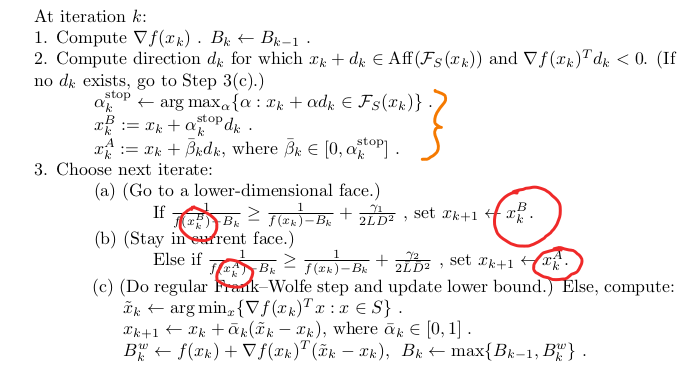

In [26]:
from IPython import display
print('Only look at this image when prompted by the comment in the code.')
display.Image(filename = 'algo.png')



In [10]:
a = np.array([1,2,1,2,1])
b = np.array([1,2,3,4,5])
np.multiply(a,b)

array([1, 4, 3, 8, 5])

In [33]:
def FW_objective_function(diff_vec):
    return 0.5*(np.power(diff_vec,2).sum())
    #return 0.5 * np.linalg.norm(diff_vec, 2)**2

def FW_inface(X, objective_function, delta, Z_init=None, max_iter=150, patience=1e-3):
    '''
    :param X: sparse matrix with ratings and 'empty values', rows - users, columns - books.
    :param objective_function: objective function that we would like to minimize with FW.
    :param Z_init: In case we want to initialize Z with a known matrix, if not given Z_init will be a zeros matrix.
    :param max_iter: max number of iterations for the method.
    :param patience: once reached this tolerance provide the result.
    :return: Z: matrix of predicted ratings - it should be like X but with no 'empty values'
            loss: difference between original values (X) and predicted ones (Z).
    '''

    # Get X indexes for not empty values
    idx_ratings = np.argwhere(X != 0)
    #idx_ratings = np.argwhere(~np.isnan(X))
    idx_rows = idx_ratings[:,0]
    idx_cols = idx_ratings[:,1]

    # choose an appropriate delta

    # Initialize Z_{-1}
    if Z_init is not None:
        Z = Z_init
    else:
        Z = np.zeros(X.shape)

    # Create vectors with the not empty features of the sparse matrix
    X_rated = X[idx_rows, idx_cols]
    Z_rated = Z[idx_rows, idx_cols]
    diff_vec = Z_rated - X_rated

    # Initial gradient and Z0
    grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))
    u_max, s_max, v_max = sparse.linalg.svds(grad, k = 1, which='LM')
    Z = -delta*np.outer(u_max,v_max)
    Z_rated = Z[idx_rows, idx_cols]

    # Initialize lower bound on the optimal objective function (f*)
    diff_vec = Z_rated - X_rated
    new_low_bound = np.max((objective_function(diff_vec) + np.multiply(diff_vec,Z_rated)),0)

    # Set L and D constants and gamma1, gamma2 constraints
    L = 1
    D = 2*delta
    gamma1 = 0
    gamma2 = 1

    # Compute first iteration thin SVD
    grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))
    r_grad = sparse.csgraph.structural_rank(grad)   # Compute rank of the gradient sparse matrix to find thin SVD size
    U_thin, D_thin, Vh_thin = sparse.linalg.svds(grad, k = r_grad, which='LM')   # Compute k = rank singular values


    # Additional needed parameters
    diff_objective = patience + 1
    objective = objective_function(diff_vec)
    it = 0
    while (diff_objective > patience) and (it < max_iter):

        # Lower bound update
        low_bound = new_low_bound

        # In-face direction with the away step strategy: two calculations depending of where Z lies within the feasible set
        if D_thin.sum() == delta: # Z in border (sum of singular values == radious of feasible set)
            G = 0.5*(Vh_thin.dot(grad.T.dot(U_thin)) + U_thin.T.dot(grad.dot(Vh_thin.T)))
            u = sparse.linalg.eigs(G, k = 1, which = 'SM')#unitary eigenvector corresponding to smallest eigenvalue of G
            M = np.outer(u,u)
            update_Z = delta*U_thin.dot(M.dot(Vh_thin))
            update_direction = Z-update_Z
            alpha_B = scipy.linalg.inv(delta*u.T.dot(scipy.linalg.inv(update_direction).dot(u))-1)
        else: #inside
            idx_max_s = np.argmax(D_thin)
            update_Z = delta*np.outer(U_thin[idx_max_s,:],Vh_thin[idx_max_s,:])
            update_direction = Z-update_Z
            alpha_B = 1/it+1 #BINARY SEARCH (xd)

        # Check if the direction is good for our purposes        
        #Supposedly these next lines do the affine hull thing
        
        
        #A "CONTINUE" SYNTAX WON'T WORK BECAUSE TWO CONDITIONS NEED TO BE SATISFIED, S0 THE OPPOSITE CAN'T BE 
        # CHECKED WITH ONE EVALUATION. (ASK ME IN PERSON IF STILL DUBIOUS)
        #ALSO I'M NOT SHOUTING THIS IS FOR READABILITY FROM DIFFERENT COMMENTERS
                
        
        nuclear_norm = D_thin.sum()
        U = nuc_norm*D_thin # standardize the simplex
        r = D_thin.shape
        no_obs = length(idx_rows)
        THRES = 0.001
        if ((abs(delta - nuc_norm) < THRESH) and r > 1):
            Z_B = Z + alpha_B*update_direction
            diff_vec_B = Z_B[idx_rows, idx_cols] - X_rated
            
            if 1/(objective_function(diff_vec_B)-low_bound) >= (1/(objective-low_bound)+gamma1/(2*L*D**2)):
                # 1. Move to a lower dimensional face
                Z = Z_B
                #SHOULDN'T THIS BE THE SAME AS THE DENOMINATOR IN THE INEQUALITY CHECK? SEE RED CIRCLES IN IMAGE

            else:
                beta = 0.5 # FIND A GOOD VALUE -- a binary search is also suggested by the paper xdd
                Z_A = Z + beta*update_direction
                diff_vec_A = Z_A[idx_rows, idx_cols] - X_rated
            if 1/(objective_function(diff_vec_A)-low_bound) >= (1/(objective-low_bound)+gamma2/(2*L*D**2)):
                # 2. Stay in the current face
                Z = Z_A
                #SHOULDN'T THIS BE THE SAME AS THE DENOMINATOR IN THE INEQUALITY CHECK? SEE RED CIRCLES IN IMAGE

        else:
            # 3. Do a regular FW step and update the lower bound
            #Zk update
            idx_max_s = np.argmax(D_thin)
            update_Z = -delta*np.outer(U_thin[idx_max_s,:],Vh_thin[:,idx_max_s]) # Am i selecting right the vectors??
            alpha_k = 2/(it+2)
            Z = (1-alpha_k)*Z + alpha_k*update_Z

                # Lower bound update
            direction_vec = update_Z.flatten() - Z.flatten()
            wolfe_gap = grad.T * direction_vec
            B_w = objective + wolfe_gap.sum() # - bound_slack This is in matlab(Gabri)s code -- is it necessary?
            new_low_bound = np.max(low_bound, B_w)

        # Loss
        diff_vec = Z[idx_rows, idx_cols] - X_rated
        new_objective = objective_function(diff_vec)

        # Improvement at this iteration
        diff_objective = np.abs(objective - new_objective)
        objective = new_objective

        # Gradient
        grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))

        # Thin SVD
        r_grad = sparse.csgraph.structural_rank(grad)   # Compute rank of the gradient sparse matrix to find thin SVD size
        U_thin, D_thin, Vh_thin = sparse.linalg.svds(grad, k = r_grad, which='LM')   # Compute k = rank singular values

        # Count iteration
        it += 1

        print('Iteration:', it, 'f(Z_k):', objective, 'f(Z_{k-1}) -f(Z_k):', diff_objective)
    return Z, objective

## Sub-Chapter